In [4]:
import sklearn
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import researchpy

In [39]:
filename = r"C:\Users\Clayg\OneDrive\Desktop\College\Fall 25 classes\Machine Learning\CS-3120-Project\GeneratedData\\DataAnalysisFinal"

In [40]:
df = pd.read_csv(filename)

In [41]:
df.head()

,ST_CASE,VEH_NO,OWNER,J_KNIFE,TRAV_SP,DR_DRINK,L_STATUS,PREV_SPD,PREV_OTH,SPEEDREL,...,FUNC_SYS,HARM_EV,MAN_COLL,RELJCT2,TYP_INT,REL_ROAD,WEATHER,VEH_AGE,OTHER_VEH_SP,OTHER_VEH_AVG_WEIGHT
0,10087,1,2.0,NaN,60.0,1,1.0,2.0,1.0,1.0,...,3.0,1.0,NaN,1.0,1.0,3,4.0,30.0,NaN,NaN
1,10114,1,1.0,NaN,NaN,0,1.0,0.0,0.0,1.0,...,3.0,4.0,8.0,1.0,1.0,1,4.0,10.0,NaN,NaN
2,10114,1,1.0,NaN,NaN,0,1.0,0.0,0.0,1.0,...,3.0,4.0,8.0,1.0,1.0,1,4.0,10.0,30.0,18.0
3,10201,2,2.0,NaN,75.0,0,1.0,1.0,0.0,1.0,...,3.0,4.0,6.0,2.0,3.0,1,1.0,20.0,NaN,NaN
4,10201,2,2.0,NaN,75.0,0,1.0,1.0,0.0,1.0,...,3.0,4.0,6.0,2.0,3.0,1,1.0,20.0,NaN,NaN


In [42]:
nan = df["J_KNIFE"].isna().sum()
print(nan)

20317


Turns out that J_KNIFE is almost always NA for this data, so we'll drop it

In [43]:
df = df.drop("J_KNIFE", axis=1)

# K-Modes Clustering 

First - replace all NaN data with "unknown" so it can be treated as its own value. The only exceptions are OTHER_VEH_SP and OTHER_VEH_AVG_WEIGHT since for those columns NaN represents "not applicable"

In [44]:
from kmodes.kmodes import KModes

In [59]:
df_clean = df.astype(str).replace('nan', 'Unknown').fillna('Unknown')

In [60]:
df_clean = df_clean.drop(["ST_CASE", "VEH_NO"], axis=1)

In [61]:
data_matrix = df_clean.to_numpy()

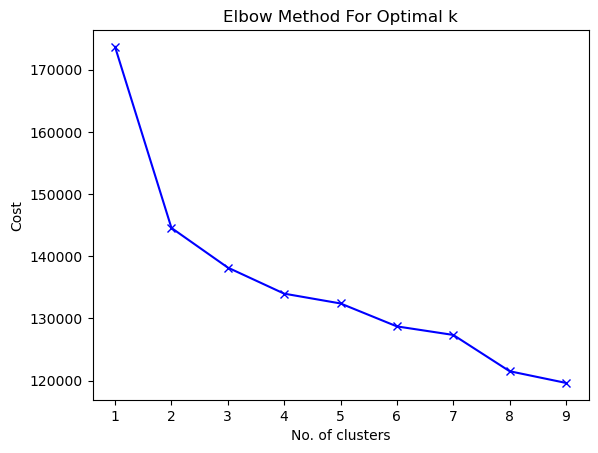

In [62]:
cost = []
K = range(1, 10)
for k in K:
    # init='Cao' is optimized for categorical density
    kmodes = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    kmodes.fit(data_matrix)
    cost.append(kmodes.cost_)

# Optional: Plot cost to pick K
import matplotlib.pyplot as plt
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

I'm choosing 2 clusters as the line seems to flatten out substantially there

In [63]:
km = KModes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = km.fit_predict(data_matrix)
print(km.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7250, cost: 134293.0
Run 1, iteration: 2/100, moves: 969, cost: 133976.0
Run 1, iteration: 3/100, moves: 113, cost: 133976.0
[['2.0' 'Unknown' '0' '1.0' '0.0' '0.0' '2.0' '2' '2' 'evening rush'
  '1.0' '2.0' '4.0' '4.0' 'Unknown' '1.0' '1.0' '1' '1.0' '10.0'
  'Unknown' 'Unknown']
 ['2.0' 'Unknown' '1' '1.0' '0.0' '0.0' '1.0' '1' '1' 'evening' '2.0'
  '1.0' '7.0' '1.0' 'Unknown' '1.0' '1.0' '4' '1.0' '20.0' 'Unknown'
  'Unknown']
 ['2.0' 'Unknown' '0' '1.0' '0.0' '0.0' '2.0' '2' '2' 'evening rush'
  '1.0' '2.0' '3.0' '4.0' '6.0' '2.0' '2.0' '1' '1.0' '20.0' 'Unknown'
  '11.0']
 ['2.0' 'Unknown' '1' '1.0' '0.0' '0.0' '2.0' '2' '2' 'evening' '2.0'
  '1.0' '5.0' '4.0' '1.0' '1.0' '1.0' '1' '1.0' '20.0' 'Unknown' '11.0']]


In [64]:
df_clean['cluster'] = clusters

**Multiple Correspondence Analysis**

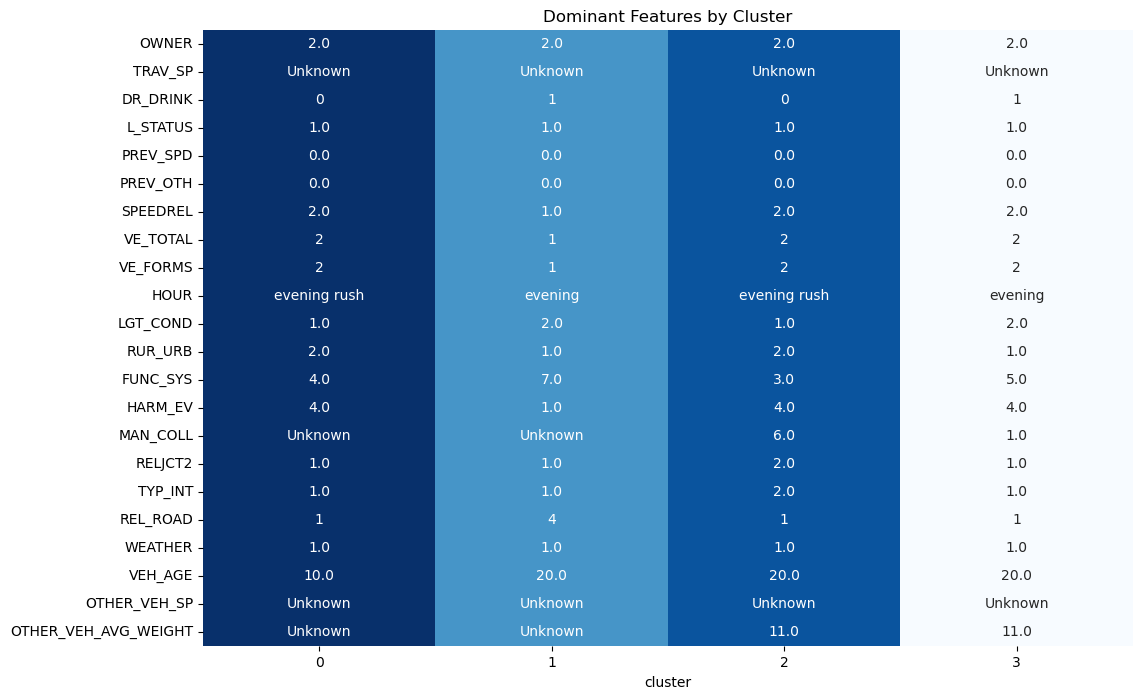

In [66]:
# 1. Calculate the Mode (most frequent value) for each cluster
# We use a lambda function to grab the top value from value_counts
cluster_modes = df_clean.groupby('cluster').agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown").T

# 2. Create a heatmap-style table
# This highlights the differences immediately
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_clean.groupby('cluster').count().T, # Simple count to visualize, or...
    annot=cluster_modes,             # ...annotate with the actual text values
    fmt="",                          # Tells seaborn the annotations are strings, not numbers
    cmap="Blues",                    # Color map (darker = more data, usually)
    cbar=False
)
plt.title("Dominant Features by Cluster")
plt.show()